<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/ProDS_%EB%AC%B8%EC%A0%9C%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv('./Dataset_02.csv')

In [4]:
df = pd.DataFrame(dt)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
# Tip 변수 생성 후 카이스퀘어 검정(변수가 모두 범주형 변수일 때)

# 변수 변환 Bining

#np.where
#Series.cut()

Q2 = df.copy()

Q2['Age_gr'] = np.where(Q2.Age<20, '10',
                        np.where(Q2.Age < 30, '20',
                                 np.where(Q2.Age < 40, '30',
                                          np.where(Q2.Age < 50, '40',
                                                   np.where(Q2.Age < 60, '50', '60')))))


In [8]:
age_gr = pd.cut(Q2.Age, [0,20,30,40,50,60, Q2.Age.max()+1],
       right = False,
       labels=[10,20,30,40,50,60])

# 최소값 표현 include_lowest=True


In [ ]:
age_gr

In [14]:
Na_K_gr = pd.cut(Q2.Na_to_K, [Q2.Na_to_K.min(), 10, 20, 30, Q2.Na_to_K.max()+1],
                 right = True,
                 labels = ['Lv1', 'Lv2', 'Lv3', 'Lv4'],
                 include_lowest = True)

In [15]:
Q2['Na_K_gr'] = Na_K_gr

In [16]:
import scipy.stats as sc #카이제곱 검정

In [17]:
Q2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Age_gr',
       'Na_K_gr'],
      dtype='object')

In [ ]:
# 입력 값이 빈도 테이블로 들어가도록 변경

sc.chi2_contingency()

In [27]:
Age_t = pd.crosstab(Q2.Age_gr, Q2.Drug)
out_age_t = sc.chi2_contingency(Age_t)
print(out_age_t[1])

Q2_temp = []

0.0007010113024729462


In [28]:
for i in ['Sex', 'BP', 'Cholesterol','Age_gr','Na_K_gr'] :
  temp = pd.crosstab(Q2[i], Q2.Drug)
  out_temp = sc.chi2_contingency(temp)
  Q2_temp.append([i, out_temp[1]])

Q2_temp

[['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_K_gr', 1.1254641594413981e-14]]

In [30]:
Q2_temp = pd.DataFrame(Q2_temp)

Q2_temp.columns = ['var', 'pvalues']

In [31]:
Q2_temp = Q2_temp[Q2_temp.pvalues < 0.05] #유의미한 변수 찾기 p값이 0.05 이하

In [34]:
Q2_temp.sort_values(by='pvalues').tail(1) #정답

,var,pvalues
3,Age_gr,0.000701


## 문제 3

In [36]:
df_sex = pd.get_dummies(df.Sex)

In [38]:
df_sex.drop("M", axis=1, inplace=True)

In [ ]:
df_sex

In [40]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [41]:
df_chol = pd.get_dummies(df.Cholesterol)

In [43]:
df_chol = df_chol.HIGH

In [47]:
df_bp = []

for i in df.BP:
  if i == "LOW":
    df_bp.append(0)
  elif i == "NORMAL":
    df_bp.append(1)
  else:
    df_bp.append(2)

df_bp = pd.DataFrame(df_bp)

In [54]:
Q3 = df

In [55]:
Q3['BP_cd'] = df_bp
Q3['Cholesterol_cd'] = df_chol
Q3['Sex_cd'] = df_sex

In [58]:
x_var = ['Age', 'Na_to_K', 
         'Sex_cd', 'BP_cd', 
         'Cholesterol_cd']

In [59]:
dt = DecisionTreeClassifier().fit(Q3[x_var], Q3.Drug)

[Text(223.20000000000002, 195.696, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(186.0, 152.208, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugB'),
 Text(111.60000000000001, 108.72, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugB'),
 Text(74.4, 65.232, 'Cholesterol_cd <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 16, 18]\nclass = drugB'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]\nclass = drugB'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugA'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]\nclass = drugB'),
 Text(260.40000000000003, 108.72, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugC'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]\nclass = drugC'),
 Text(297.6

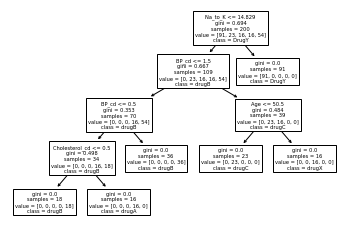

In [60]:
plot_tree(dt, feature_names=x_var, class_names=Q3.Drug.unique())

In [64]:
export_text(dt,feature_names=x_var, decimals=3)

'|--- Na_to_K <= 14.829\n|   |--- BP_cd <= 1.500\n|   |   |--- BP_cd <= 0.500\n|   |   |   |--- Cholesterol_cd <= 0.500\n|   |   |   |   |--- class: drugX\n|   |   |   |--- Cholesterol_cd >  0.500\n|   |   |   |   |--- class: drugC\n|   |   |--- BP_cd >  0.500\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.500\n|   |   |--- Age <= 50.500\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.500\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.829\n|   |--- class: DrugY\n'

In [65]:
#Na_to_K <= 14.829

# 문제세트 3

In [66]:
#변수 생성(forehead_ration)
#생성된 변수 기준으로 평균과 표준편차 계산
# 평균 - 3*표준편차, 평균 + 3*표준편차 = 이상치

In [67]:
data = pd.DataFrame(pd.read_csv('./Dataset_03.csv'))

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [89]:
forehead_ratio = data.forehead_width_cm/data.forehead_height_cm * 100

In [90]:
dt = data.copy()

In [91]:
dt['forehead_ratio'] = forehead_ratio

In [92]:
dt['forehead_ratio'].describe()

count    5001.000000
mean      223.361872
std        26.452530
min       161.971831
25%       204.285714
50%       221.875000
75%       240.677966
max       303.921569
Name: forehead_ratio, dtype: float64

In [93]:
m1 = dt['forehead_ratio'].mean()
std1 = dt['forehead_ratio'].std()

In [94]:
LL = m1 - (3*std1)
UU = m1 + (3*std1)

In [95]:
out = dt[(dt['forehead_ratio']<LL) | (dt['forehead_ratio']>UU)]

In [96]:
out

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_ratio
1641,1,15.5,5.1,1,1,1,1,Male,303.921569
1817,1,15.5,5.1,1,0,1,1,Male,303.921569
4948,0,15.5,5.1,1,1,1,1,Male,303.921569


In [97]:
ans = len(out)

In [98]:
ans

3

## 문제 2

In [99]:
# 독립인 두 집단 간의 평균 차이 검정

from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

In [100]:
Q1 = data.copy()

In [105]:
ttest_ind(dt.forehead_ratio[dt.gender == 'Male'],
          dt.forehead_ratio[dt.gender == 'Female'],
          equal_var = False)

Ttest_indResult(statistic=2.9994984197510854, pvalue=0.002718670239066328)

## 문제 3

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import  classification_report, precision_score

In [109]:
Q3 = data.copy()

In [110]:
X = Q3.drop('gender', axis=1)
y = Q3.gender

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) 

In [ ]:
y_test

In [122]:
model = LogisticRegression()

In [123]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
pred = model.predict(X_test)

In [130]:
precision_score(y_test, pred, pos_label='Male')

0.9596354166666666

In [129]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Female       0.97      0.96      0.96       743
        Male       0.96      0.97      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [131]:
(pred[:, 1] > 0.7).sum()

IndexError: ignored

#문제세트 4

## 문제 1


In [132]:
data = pd.DataFrame(pd.read_csv('./Dataset_04.csv'))

In [135]:
q1 = data.copy()

In [136]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  6718 non-null   object 
 1   SUBJECT   6718 non-null   object 
 2   TIME      6718 non-null   int64  
 3   Value     6718 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 210.1+ KB


In [140]:
q1_kor = (q1[q1['LOCATION'] == 'KOR'])

In [141]:
q1_kor

,LOCATION,SUBJECT,TIME,Value
442,KOR,BEEF,1991,5.085481
443,KOR,BEEF,1992,5.685434
444,KOR,BEEF,1993,5.325765
445,KOR,BEEF,1994,5.698819
446,KOR,BEEF,1995,6.568429
...,...,...,...,...
583,KOR,SHEEP,2022,0.197951
584,KOR,SHEEP,2023,0.199098
585,KOR,SHEEP,2024,0.200266
586,KOR,SHEEP,2025,0.201451


In [147]:
q1_out = pd.pivot_table(data = q1_kor, index='TIME',
                        values = 'Value',
                        aggfunc = 'sum')

In [150]:
q1_reset = q1_out.reset_index()

In [153]:
answer = q1_reset.corr()['Value']['TIME']

In [154]:
answer.round(3)

0.96

## 문제 2
  - 대응표본일때는 ttest rel
  - 단일표본일때는 ttest ind

In [155]:
q2 = data.copy()

In [163]:
q2 = q2.loc[((q2.LOCATION == 'JPN')|(q2.LOCATION =='KOR'))]

In [170]:
q2_pivot = pd.pivot_table(data=q2, values='Value', index=['TIME','SUBJECT'], columns = 'LOCATION', aggfunc='sum')

In [171]:
q2_reset = q2_pivot.reset_index()

In [173]:
q2q2 = q2_reset.dropna()

In [196]:
q2q2

LOCATION,TIME,SUBJECT,JPN,KOR
2,1990,POULTRY,12.844865,5.570102
3,1990,SHEEP,0.756696,0.204153
4,1991,BEEF,6.517055,5.085481
5,1991,PIG,13.239267,9.930182
6,1991,POULTRY,12.055422,6.738203
...,...,...,...,...
143,2025,SHEEP,0.125060,0.201451
144,2026,BEEF,6.844875,10.737425
145,2026,PIG,15.544018,29.544063
146,2026,POULTRY,14.768340,17.907865


In [178]:
sub_list = q2q2.SUBJECT.unique().tolist()

In [179]:
q2_list = []

for i in sub_list:
  temp = q2q2[q2q2.SUBJECT==i]
  pvalue = ttest_rel(temp['KOR'], temp['JPN']).pvalue
  q2_list = q2_list +[[i, pvalue]]

In [180]:
q2_list = pd.DataFrame(q2_list, columns=['sub','pvalue'])

In [182]:
q2_ans = q2_list[q2_list.pvalue >= 0.05] # 차이가 없다는 말은 귀무가설을 채택하겠다는 의미

In [186]:
print(q2_ans['sub'])

0    POULTRY
Name: sub, dtype: object


## 문제 3

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from statsmodels.api import  OLS, add_constant

In [188]:
q3 = data.copy()

In [189]:
q3 = q3[q3.LOCATION == 'KOR']

In [190]:
q3q3 = q3.groupby(by=['TIME','SUBJECT'])

In [194]:
q3 = q3q3.sum()

In [197]:
q3 = q3.reset_index()

In [198]:
q3

,TIME,SUBJECT,Value
0,1990,POULTRY,5.570102
1,1990,SHEEP,0.204153
2,1991,BEEF,5.085481
3,1991,PIG,9.930182
4,1991,POULTRY,6.738203
...,...,...,...
141,2025,SHEEP,0.201451
142,2026,BEEF,10.737425
143,2026,PIG,29.544063
144,2026,POULTRY,17.907865


In [202]:
q3_out = []

for i in sub_list:
  temp = q3[q3.SUBJECT == i]
  lm = LinearRegression()
  lm.fit(temp[['TIME']], temp.Value)
  # X(입력 변수) 2차원 구조로 입력
  r2_score = lm.score(temp[['TIME']], temp.Value)
  q3_out = q3_out + [[i, r2_score]]

In [203]:
q3_out = pd.DataFrame(q3_out, columns=['sub', 'r2_score'])

In [204]:
temp2 = q3[q3.SUBJECT == 'POULTRY']
lm2=LinearRegression().fit(temp2[['TIME']], temp2.Value)

In [205]:
pred = lm2.predict(temp2[['TIME']])

In [209]:
# MAPE
mape = (abs(temp2.Value - pred)/temp2.Value).sum() * 100 / len(temp2)

In [210]:
mape

5.783357902874551